# MSDS 432, Assignment 3 - Recursion

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import sys

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
sys.setrecursionlimit(5000) # increase the default max recursion depth for benchmark results.

## Factoral Algorithms

In [5]:
def factoral_recursive(n):
    """Recursive version of Factoral (n!)"""
    if n == 1:
        return 1
    else:
        return n * factoral_recursive(n-1)
    
def factoral_iterative(n):
    """Iterative version of Factoral (n!)"""
    result = 1
    for i in range(n, 1, -1):
        result *= i
    return result

def profile(func):
    """Utility function to help profile the runtime of code blocks."""
    start_time = time()
    func()
    return time() - start_time

## Benchmark

In [6]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['N', 'Factoral', 'Recursive', 'Iterative', 'Diff'])

In [7]:
dataset = [int(np.random.uniform(2000, 3500)) for k in range(0, 10)] # increased the numeric range due to getting all zeros.
dataset.sort() # order from largest to smallest for charting

for index in range(len(dataset)): # iterate the dataset
    n = dataset[index]
    recursive_time = profile(lambda: factoral_recursive(n)) # profile recursive version
    iterative_time = profile(lambda: factoral_iterative(n)) # profile iterative version
    
    fac_int = factoral_iterative(n)
    fac_rec = factoral_recursive(n)
    
    assert fac_int == fac_rec # ensure the two version return the same result.
    
    results.loc[index] = [n, str(fac_int), recursive_time, iterative_time, recursive_time - iterative_time] # save it.

## Results

In [8]:
results # display the results table / DataFrame

,N,Factoral,Recursive,Iterative,Diff
0,2165,1217971911917252718968109433296170266083431434...,0.001004,0.000994,0.000009
1,2203,9567692329887596361031567707694096451554801004...,0.000995,0.001002,-0.000007
2,2868,8096766443837134633832197023508842954757414586...,0.002028,0.001007,0.001021
3,2966,3001756599027096008170361392950831864888678615...,0.001998,0.001000,0.000998
4,3313,6842425973416112300731944827818785181610199008...,0.001992,0.002000,-0.000009
5,3355,6344244510640784303976274784525880352705844621...,0.002000,0.002036,-0.000036
6,3441,3105196211733875608386227989790827670004632565...,0.002000,0.002065,-0.000066
7,3460,5164554695657782196771494005043899606815980566...,0.001991,0.001999,-0.000008
8,3463,2142959856530032656413871970119865752163155298...,0.015986,0.002000,0.013986
9,3498,1952499244255623668064661326659569007076495100...,0.002005,0.001991,0.000014


## Summary

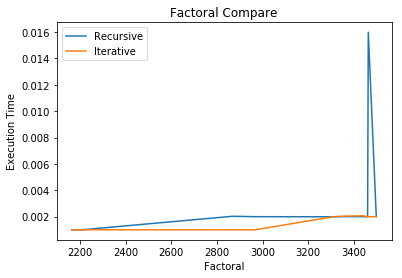

In [9]:
# Chart the relevant metrics about the three algorithms in comparision.
ax = results[['N', 'Recursive', 'Iterative']].plot.line(x='N', title='Factoral Compare')
ax.set_xlabel('Factoral')
ax.set_ylabel('Execution Time')
plt.show()